In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import os
from sklearnex import patch_sklearn
patch_sklearn()
import warnings
from decimal import Decimal
warnings.filterwarnings('ignore')

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


## Read Data

In [83]:
df = pd.read_csv("./cardio_train.csv",sep=';')

In [84]:
print(df)

          id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393       2     168    62.0    110     80            1     1   
1          1  20228       1     156    85.0    140     90            3     1   
2          2  18857       1     165    64.0    130     70            3     1   
3          3  17623       2     169    82.0    150    100            1     1   
4          4  17474       1     156    56.0    100     60            1     1   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993  19240       2     168    76.0    120     80            1     1   
69996  99995  22601       1     158   126.0    140     90            2     2   
69997  99996  19066       2     183   105.0    180     90            3     1   
69998  99998  22431       1     163    72.0    135     80            1     2   
69999  99999  20540       1     170    72.0    120     80            2     1   

       smoke  alco  active  cardio  
0 

In [85]:
df.shape

(70000, 13)

## Data Exploration

In [86]:
df["cardio"].value_counts()

cardio
0    35021
1    34979
Name: count, dtype: int64

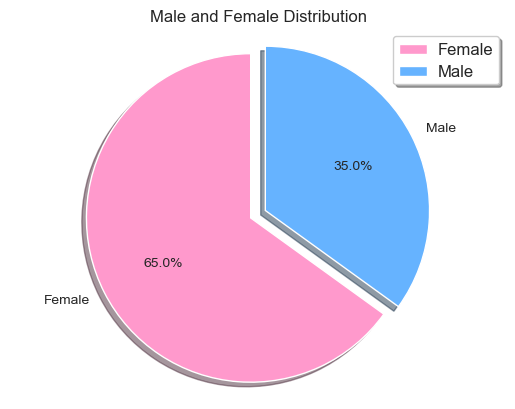

In [87]:
gender_counts = df['gender'].value_counts()
labels = ['Female', 'Male']
colors = ['#ff99cc', '#66b3ff']
explode = [0.1, 0]

fig, ax = plt.subplots()
ax.pie(gender_counts, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=90, shadow=True)

ax.axis('equal')  
ax.set_title('Male and Female Distribution')

legend = ax.legend(loc='upper right', shadow=True)
for text in legend.get_texts():
    text.set_fontsize(12)

plt.show()

In [88]:
df.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1.000000,0.003457,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799
age,0.003457,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159
gender,0.003502,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.003038,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,-0.001830,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.003356,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,-0.002529,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.006106,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.002467,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.003699,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486


In [89]:
df.isnull().sum

<bound method DataFrame.sum of           id    age  gender  height  weight  ap_hi  ap_lo  cholesterol   gluc  \
0      False  False   False   False   False  False  False        False  False   
1      False  False   False   False   False  False  False        False  False   
2      False  False   False   False   False  False  False        False  False   
3      False  False   False   False   False  False  False        False  False   
4      False  False   False   False   False  False  False        False  False   
...      ...    ...     ...     ...     ...    ...    ...          ...    ...   
69995  False  False   False   False   False  False  False        False  False   
69996  False  False   False   False   False  False  False        False  False   
69997  False  False   False   False   False  False  False        False  False   
69998  False  False   False   False   False  False  False        False  False   
69999  False  False   False   False   False  False  False        False  False 

In [90]:
# The age column is in unit of days, instead of years. So, the data of age column will be corrected to years, to better understand the age.
df["age"] = df["age"].apply(lambda x: round(x/365))
(df["age"] > 35).value_counts()/len(df["age"])*100


age
True     99.994286
False     0.005714
Name: count, dtype: float64

In [91]:
# The age value of patients below 35 is very small.
(df["age"] < 35).value_counts()/len(df["age"])*100

age
False    99.994286
True      0.005714
Name: count, dtype: float64

In [92]:
df.rename(columns = {'alco':'alcohol_intake'}, inplace = True)
df["alcohol_intake"].value_counts()/len(df["alcohol_intake"])*100

alcohol_intake
0    94.622857
1     5.377143
Name: count, dtype: float64

In [93]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alcohol_intake,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0


In [94]:
# Adding a new parameter for Body Mass Index (bmi), a metric used to classify weight per height class.
# This will be a better indicator of health using weight and height.
# BMI = kg/m^2
df["bmi"] = df["weight"] *10000 / ((df["height"])**2)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alcohol_intake,active,cardio,bmi
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


In [95]:
# Now the bmi can be split into classes of bmi, which would help understand the data more.
bmi_ranges = [
    (df["bmi"] <= 15),                         # 0 - Anorexic
    (df["bmi"] > 15) & (df["bmi"] <= 18.5),    # 1 - Underweight
    (df["bmi"] > 18.5) & (df["bmi"] <= 25),    # 2 - Normal weight
    (df["bmi"] > 25) & (df["bmi"] <= 30),      # 3 - Overweight
    (df["bmi"] > 30) & (df["bmi"] <= 35),      # 4 - Obesity Class I
    (df["bmi"] > 35) & (df["bmi"] <= 40),      # 5 - Obesity Class II
    (df["bmi"] > 40)                           # 6 - Obesity Class III 
]

classes = [0, 1, 2, 3, 4, 5, 6]

df["bmi_class"] = np.select(bmi_ranges, classes)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alcohol_intake,active,cardio,bmi,bmi_class
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,2
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,4
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,2
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,3
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,2


In [96]:
# To check the percentage of patient of different bmi class.
x = df["bmi_class"].value_counts()/len(df["bmi_class"])*100
x.apply(Decimal)
print(x.round(decimals = 2))

bmi_class
2    36.86
3    35.82
4    17.44
5     6.27
6     2.67
1     0.89
0     0.04
Name: count, dtype: float64


In [97]:
# Mean of BMI of a particular aged patients.
df.groupby("age")[[ "bmi"]].mean()

,bmi
age,
30,23.922670
39,26.863118
40,26.336658
41,26.541282
42,26.467283
43,27.031119
44,26.781773
45,27.047410
46,26.957121


Text(0, 0.5, 'BMI')

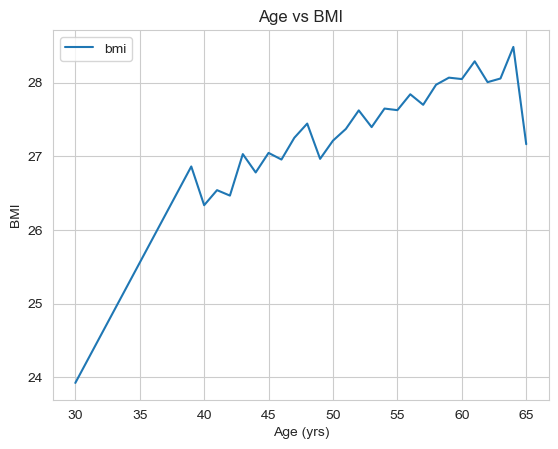

In [98]:
# Plotting age with respect to body-mass index (bmi).
df.groupby("age")[[ "bmi"]].mean().plot()
plt.title("Age vs BMI")
plt.xlabel("Age (yrs)")
plt.ylabel("BMI")

Text(0, 0.5, 'Blood Pressure (mmHg)')

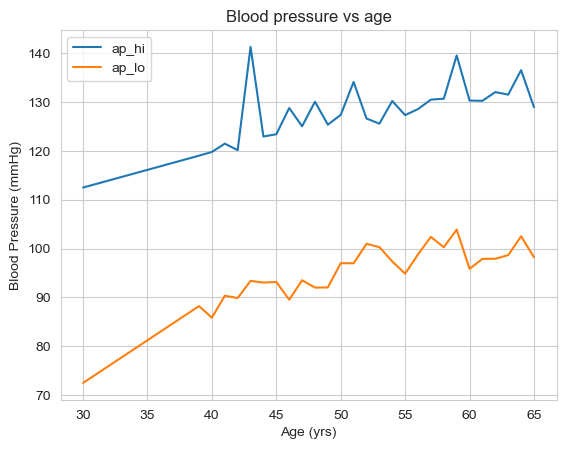

In [99]:
# Plotting age with respect to the blood pressure (both systolic and diastolic)
df.groupby("age")[[ "ap_hi", "ap_lo"]].mean().plot()
plt.title("Blood pressure vs age")
plt.xlabel("Age (yrs)")
plt.ylabel("Blood Pressure (mmHg)")

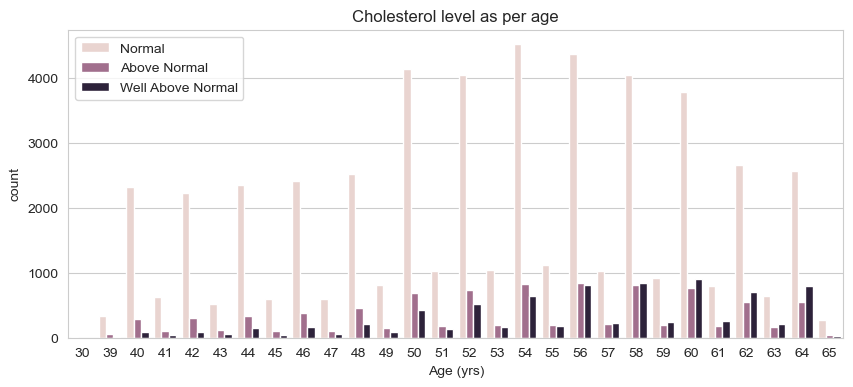

In [100]:
# Plotting age with respect to cholesterol level.
plt.figure(figsize = (10,4))
sns.countplot(data = df, x = "age",  hue = "cholesterol")
plt.title("Cholesterol level as per age")
plt.xlabel("Age (yrs)")
plt.legend(["Normal", "Above Normal", "Well Above Normal"])

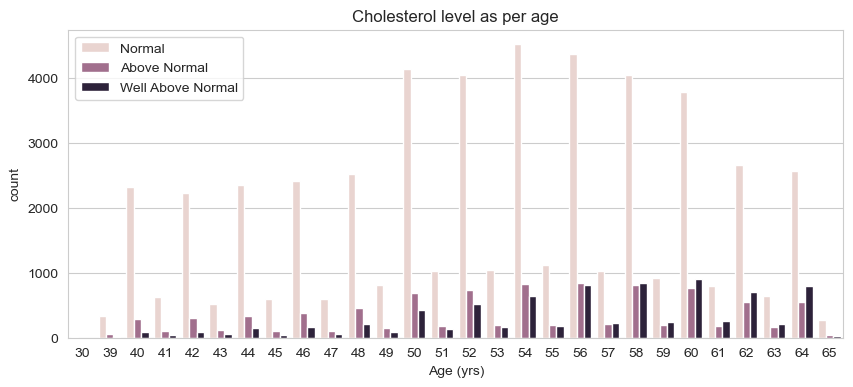

In [101]:
# Plotting age with respect to cholesterol level.
plt.figure(figsize = (10,4))
sns.countplot(data = df, x = "age",  hue = "cholesterol")
plt.title("Cholesterol level as per age")
plt.xlabel("Age (yrs)")
plt.legend(["Normal", "Above Normal", "Well Above Normal"])

In [102]:
df.rename(columns = {"gluc": "glucose"}, inplace = True)
df.head()
# To check the percentage of glucose level of the patients.
x = df["glucose"].value_counts()/len(df["glucose"])*100
x.apply(Decimal)
print(x.round(decimals = 2)) # For rounding off the values.

glucose
1    84.97
3     7.62
2     7.41
Name: count, dtype: float64


In [103]:
df["glucose"] = df["glucose"].apply(lambda x: x-1)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,glucose,smoke,alcohol_intake,active,cardio,bmi,bmi_class
0,0,50,2,168,62.0,110,80,1,0,0,0,1,0,21.967120,2
1,1,55,1,156,85.0,140,90,3,0,0,0,1,1,34.927679,4
2,2,52,1,165,64.0,130,70,3,0,0,0,0,1,23.507805,2
3,3,48,2,169,82.0,150,100,1,0,0,0,1,1,28.710479,3
4,4,48,1,156,56.0,100,60,1,0,0,0,0,0,23.011177,2


In [104]:
x = df["glucose"].value_counts()/len(df["glucose"])*100
x.apply(Decimal)
print(x.round(decimals = 2))

glucose
0    84.97
2     7.62
1     7.41
Name: count, dtype: float64


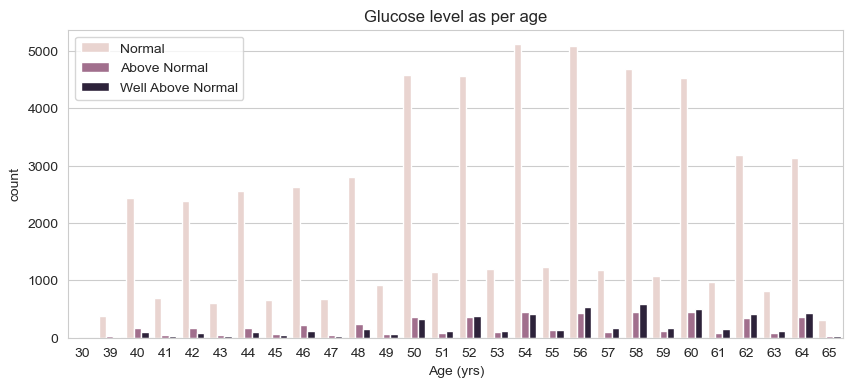

In [105]:
# Plotting age with respect to glucose level.
plt.figure(figsize = (10,4))
sns.countplot(data = df, x = "age",  hue = "glucose")
plt.title("Glucose level as per age")
plt.xlabel("Age (yrs)")
plt.legend(["Normal", "Above Normal", "Well Above Normal"])

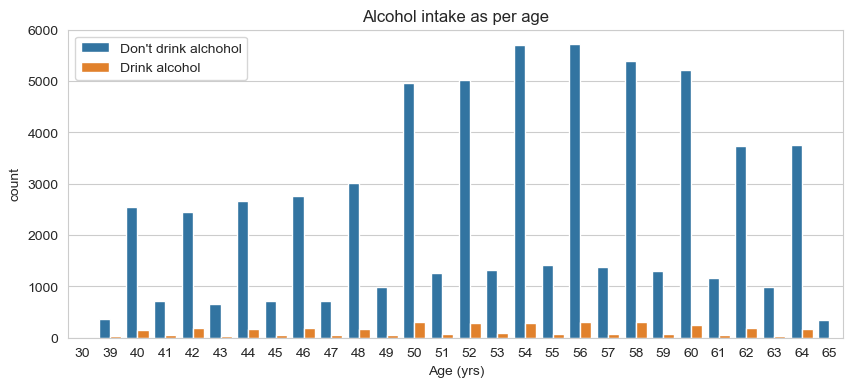

In [106]:
# Plotting age with respect to alcohol consumption.
plt.figure(figsize = (10,4))
sns.countplot(data = df, x = "age",  hue = "alcohol_intake")
plt.title("Alcohol intake as per age")
plt.xlabel("Age (yrs)")
plt.legend(["Don't drink alchohol", "Drink alcohol"])

In [107]:
df["smoke"].value_counts()/len(df["smoke"])*100

smoke
0    91.187143
1     8.812857
Name: count, dtype: float64

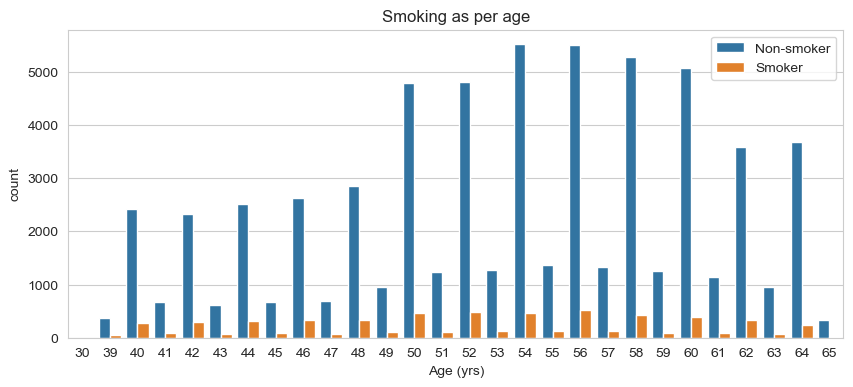

In [108]:
# Plotting age with respect to smoking.
plt.figure(figsize = (10,4))
sns.countplot(data = df, x = "age",  hue = "smoke")
plt.title("Smoking as per age")
plt.xlabel("Age (yrs)")
plt.legend(["Non-smoker", "Smoker"])

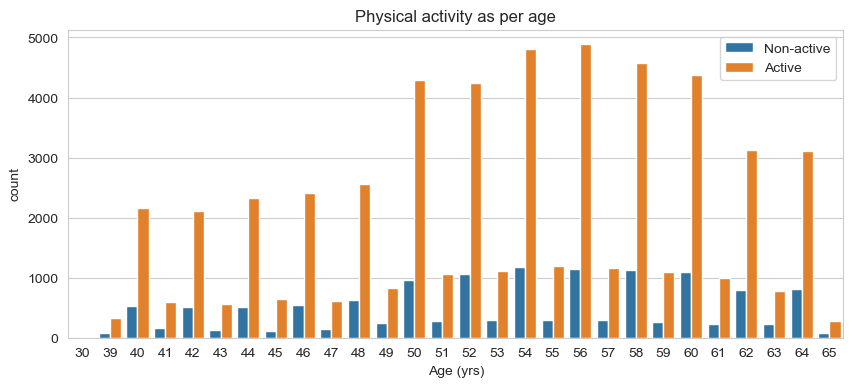

In [109]:
# Plotting age with respect to physical activity.
plt.figure(figsize = (10,4))
sns.countplot(data = df, x = "age",  hue = "active")
plt.title("Physical activity as per age")
plt.xlabel("Age (yrs)")
plt.legend(["Non-active", "Active"])

In [110]:
df.rename(columns = {"gender": "male"}, inplace = True)
df.head() 
# Percentage of each value present in 'male' column.
df["male"].value_counts()/len(df["male"])*100

male
1    65.042857
2    34.957143
Name: count, dtype: float64

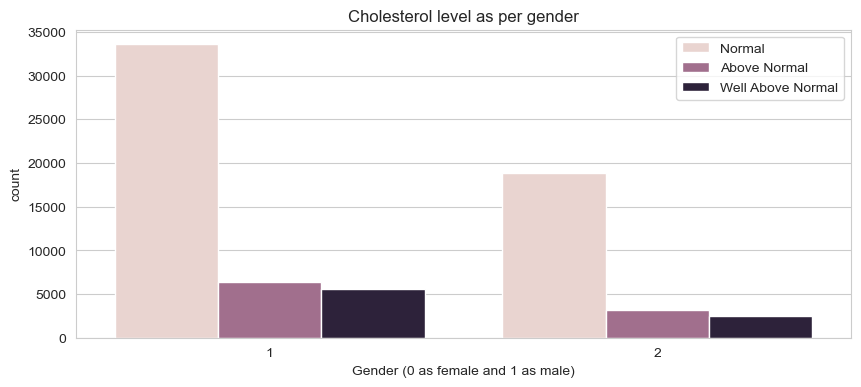

In [111]:
# Plotting gender with respect to cholesterol level.
plt.figure(figsize = (10,4))
sns.countplot(data = df, x = "male",  hue = "cholesterol")
plt.title("Cholesterol level as per gender")
plt.xlabel("Gender (0 as female and 1 as male)")
plt.legend(["Normal", "Above Normal", "Well Above Normal"])

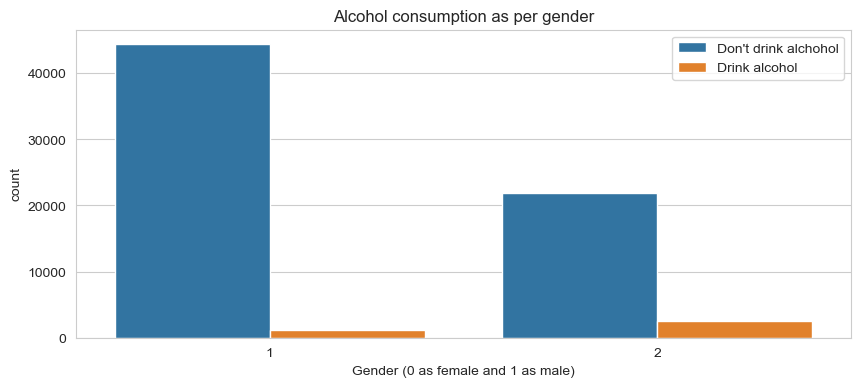

In [112]:
# Plotting gender with respect to smoking.
plt.figure(figsize = (10,4))
sns.countplot(data = df, x = "male",  hue = "alcohol_intake")
plt.title("Alcohol consumption as per gender")
plt.xlabel("Gender (0 as female and 1 as male)")
plt.legend(["Don't drink alchohol", "Drink alcohol"])

In [113]:
# Now the bmi can be split into classes of bmi, which would help understand the data more.
bmi_ranges = [
    (df["bmi"] <= 15),                         # 0 - Anorexic
    (df["bmi"] > 15) & (df["bmi"] <= 18.5),    # 1 - Underweight
    (df["bmi"] > 18.5) & (df["bmi"] <= 25),    # 2 - Normal weight
    (df["bmi"] > 25) & (df["bmi"] <= 30),      # 3 - Overweight
    (df["bmi"] > 30) & (df["bmi"] <= 35),      # 4 - Obesity Class I
    (df["bmi"] > 35) & (df["bmi"] <= 40),      # 5 - Obesity Class II
    (df["bmi"] > 40)                           # 6 - Obesity Class III 
]

classes = [0, 1, 2, 3, 4, 5, 6]

df["bmi_class"] = np.select(bmi_ranges, classes)
df.head()


,id,age,male,height,weight,ap_hi,ap_lo,cholesterol,glucose,smoke,alcohol_intake,active,cardio,bmi,bmi_class
0,0,50,2,168,62.0,110,80,1,0,0,0,1,0,21.967120,2
1,1,55,1,156,85.0,140,90,3,0,0,0,1,1,34.927679,4
2,2,52,1,165,64.0,130,70,3,0,0,0,0,1,23.507805,2
3,3,48,2,169,82.0,150,100,1,0,0,0,1,1,28.710479,3
4,4,48,1,156,56.0,100,60,1,0,0,0,0,0,23.011177,2


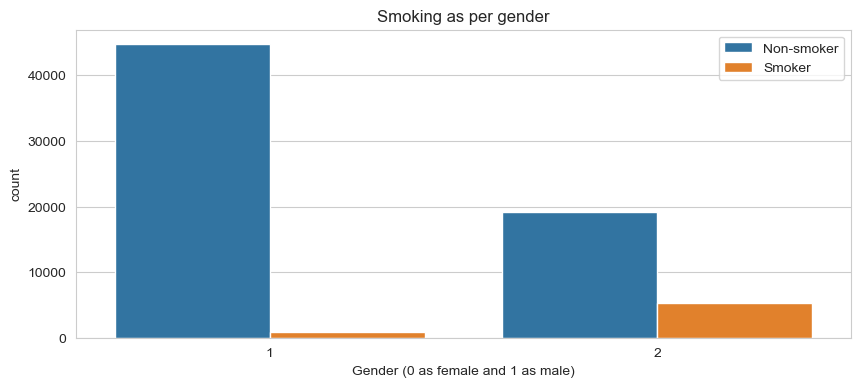

In [114]:
# Plotting gender with respect to smoking.
plt.figure(figsize = (10,4))
sns.countplot(data = df, x = "male",  hue = "smoke")
plt.title("Smoking as per gender")
plt.xlabel("Gender (0 as female and 1 as male)")
plt.legend(["Non-smoker", "Smoker"])


In [115]:
# Rename the name of the column 'cardio' to 'cvd' for better understanding.
df.rename(columns = {'cardio':'cvd'}, inplace = True)
df["cvd"].value_counts()/len(df["cvd"])*100

cvd
0    50.03
1    49.97
Name: count, dtype: float64

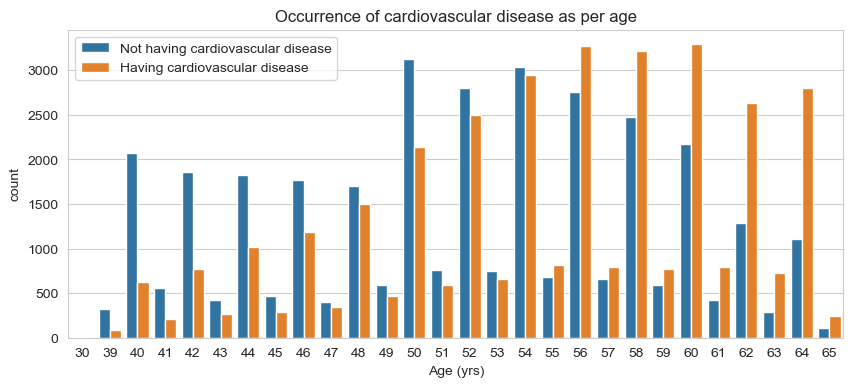

In [116]:
plt.figure(figsize = (10,4))
sns.countplot(data = df, x = "age",  hue = "cvd")
plt.title("Occurrence of cardiovascular disease as per age")
plt.xlabel("Age (yrs)")
plt.legend(["Not having cardiovascular disease", "Having cardiovascular disease"])

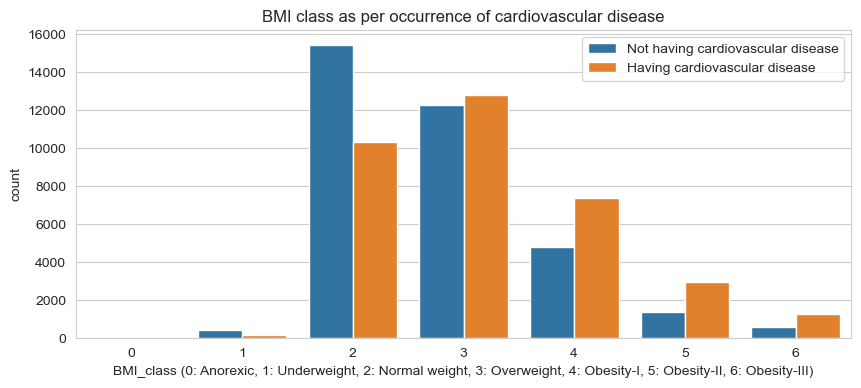

In [117]:
# Plotting BMI class with respect to occurrence of cardiovascular disease.
plt.figure(figsize = (10,4))
sns.countplot(data = df, x = "bmi_class",  hue = "cvd")
plt.title("BMI class as per occurrence of cardiovascular disease")
plt.xlabel("BMI_class (0: Anorexic, 1: Underweight, 2: Normal weight, 3: Overweight, 4: Obesity-I, 5: Obesity-II, 6: Obesity-III)")
plt.legend(["Not having cardiovascular disease", "Having cardiovascular disease"])

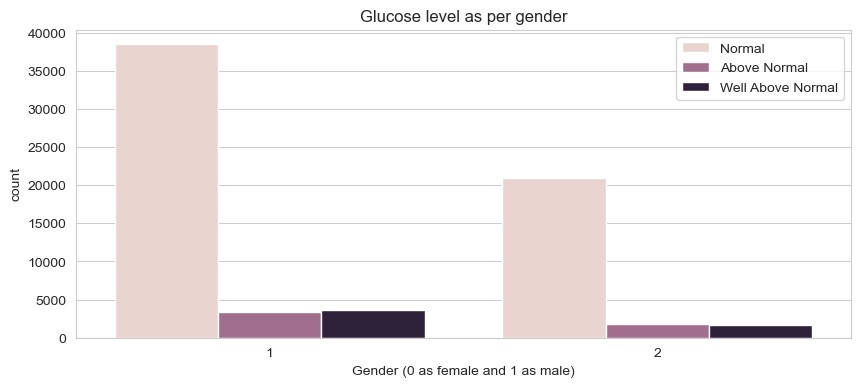

In [118]:
# Plotting gender with respect to glucose level.
plt.figure(figsize = (10,4))
sns.countplot(data = df, x = "male",  hue = "glucose")
plt.title("Glucose level as per gender")
plt.xlabel("Gender (0 as female and 1 as male)")
plt.legend(["Normal", "Above Normal", "Well Above Normal"])

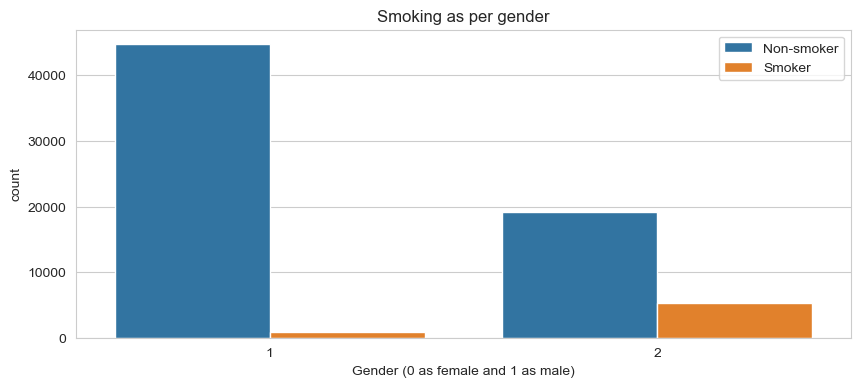

In [119]:
# Plotting gender with respect to smoking.
plt.figure(figsize = (10,4))
sns.countplot(data = df, x = "male",  hue = "smoke")
plt.title("Smoking as per gender")
plt.xlabel("Gender (0 as female and 1 as male)")
plt.legend(["Non-smoker", "Smoker"])

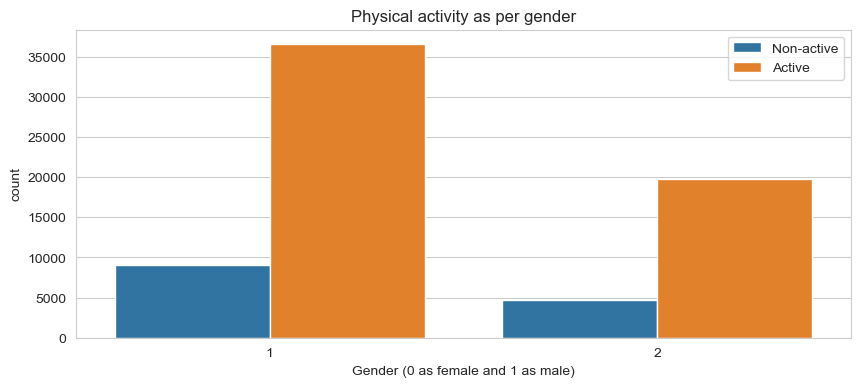

In [120]:
# Plotting gender with respect to physical activity.
plt.figure(figsize = (10,4))
sns.countplot(data = df, x = "male",  hue = "active")
plt.title("Physical activity as per gender")
plt.xlabel("Gender (0 as female and 1 as male)")
plt.legend(["Non-active", "Active"])

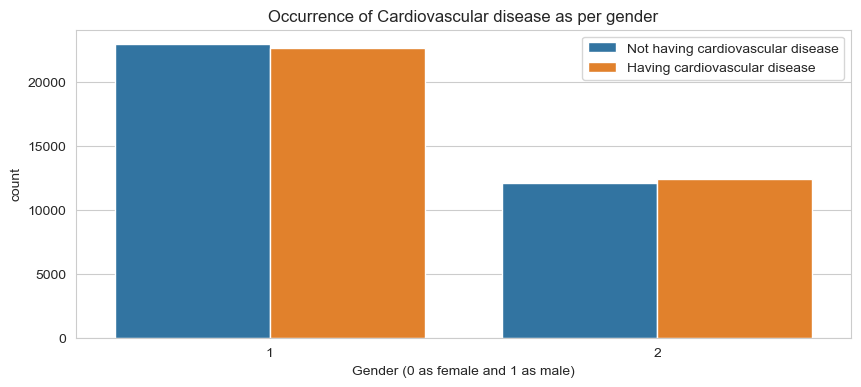

In [121]:
# Plotting gender with respect to occurrence of cardiovascular disease.
plt.figure(figsize = (10,4))
sns.countplot(data = df, x = "male",  hue = "cvd")
plt.title("Occurrence of Cardiovascular disease as per gender")
plt.xlabel("Gender (0 as female and 1 as male)")
plt.legend(["Not having cardiovascular disease", "Having cardiovascular disease"])

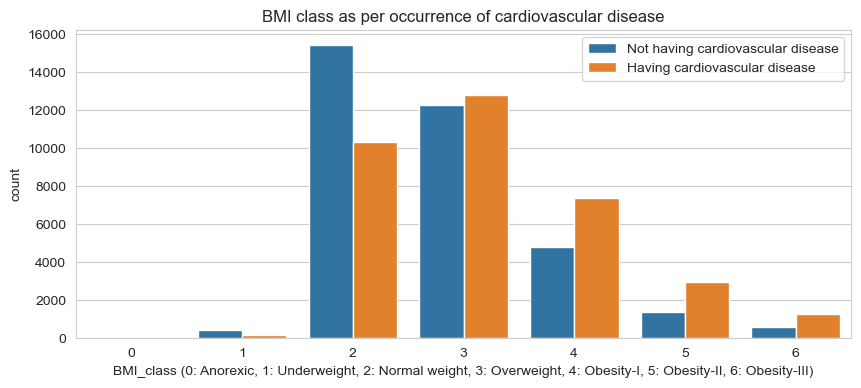

In [122]:
# Plotting BMI class with respect to occurrence of cardiovascular disease.
plt.figure(figsize = (10,4))
sns.countplot(data = df, x = "bmi_class",  hue = "cvd")
plt.title("BMI class as per occurrence of cardiovascular disease")
plt.xlabel("BMI_class (0: Anorexic, 1: Underweight, 2: Normal weight, 3: Overweight, 4: Obesity-I, 5: Obesity-II, 6: Obesity-III)")
plt.legend(["Not having cardiovascular disease", "Having cardiovascular disease"])

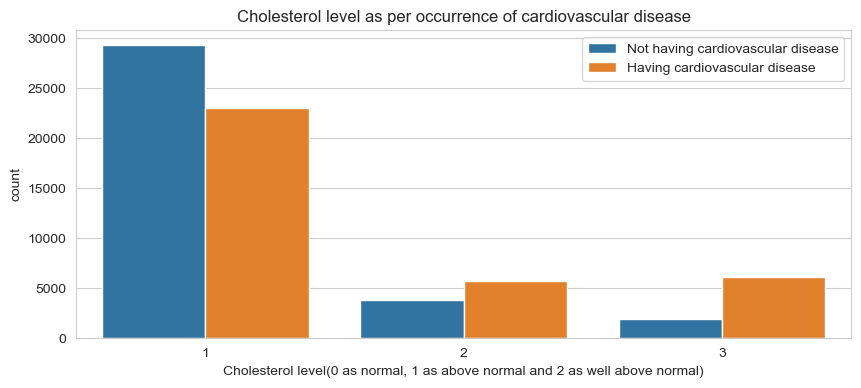

In [123]:
# Plotting cholesterol level with respect to occurrence of cardiovascular disease.
plt.figure(figsize = (10,4))
sns.countplot(data = df, x = "cholesterol",  hue = "cvd")
plt.title("Cholesterol level as per occurrence of cardiovascular disease")
plt.xlabel("Cholesterol level(0 as normal, 1 as above normal and 2 as well above normal)")
plt.legend(["Not having cardiovascular disease", "Having cardiovascular disease"])

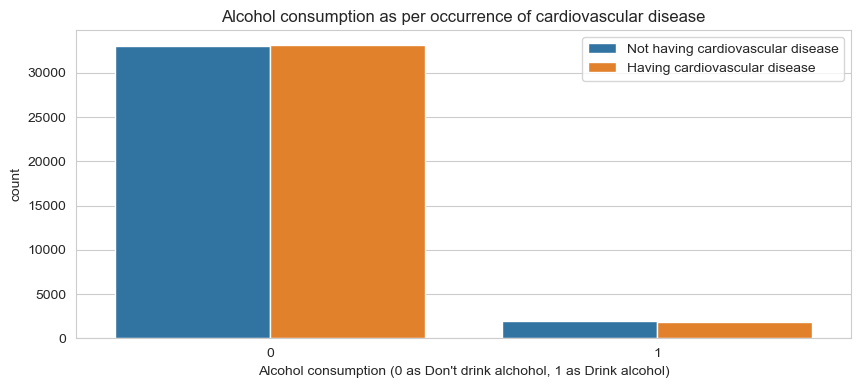

In [124]:
# Plotting alcohol consumption with respect to occurrence of cardiovascular disease.
plt.figure(figsize = (10,4))
sns.countplot(data = df, x = "alcohol_intake",  hue = "cvd")
plt.title("Alcohol consumption as per occurrence of cardiovascular disease")
plt.xlabel("Alcohol consumption (0 as Don't drink alchohol, 1 as Drink alcohol)")
plt.legend(["Not having cardiovascular disease", "Having cardiovascular disease"])

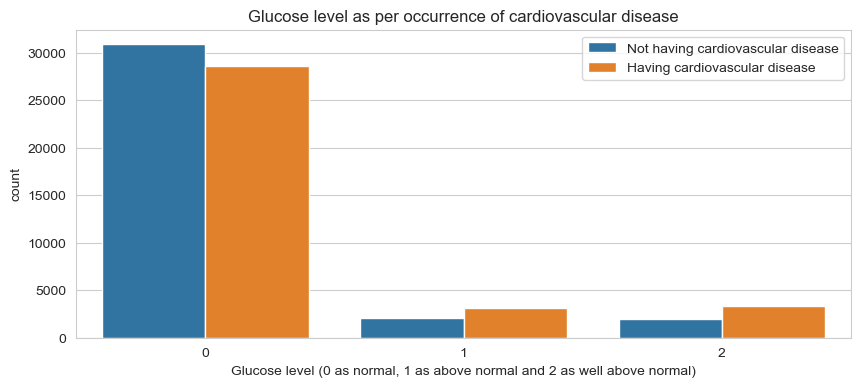

In [125]:
# Plotting glucose level with respect to occurrence of cardiovascular disease.
plt.figure(figsize = (10,4))
sns.countplot(data = df, x = "glucose",  hue = "cvd")
plt.title("Glucose level as per occurrence of cardiovascular disease")
plt.xlabel("Glucose level (0 as normal, 1 as above normal and 2 as well above normal)")
plt.legend(["Not having cardiovascular disease", "Having cardiovascular disease"])

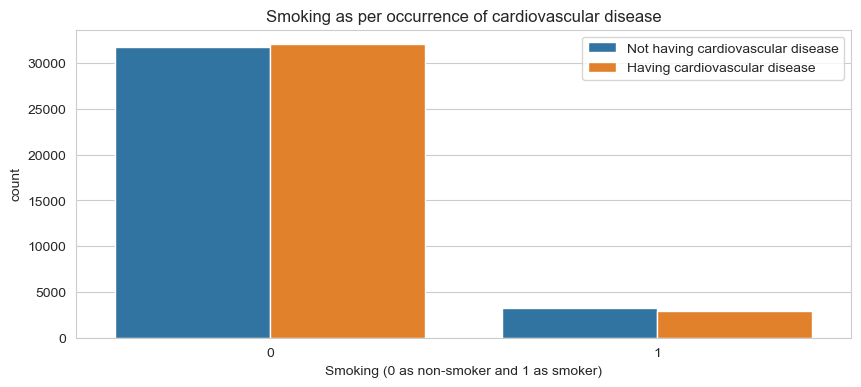

In [126]:
# Plot of smoking with respect to occurrence of cardiovascular disease.
plt.figure(figsize = (10,4))
sns.countplot(data = df, x = "smoke",  hue = "cvd")
plt.title("Smoking as per occurrence of cardiovascular disease")
plt.xlabel("Smoking (0 as non-smoker and 1 as smoker)")
plt.legend(["Not having cardiovascular disease", "Having cardiovascular disease"])

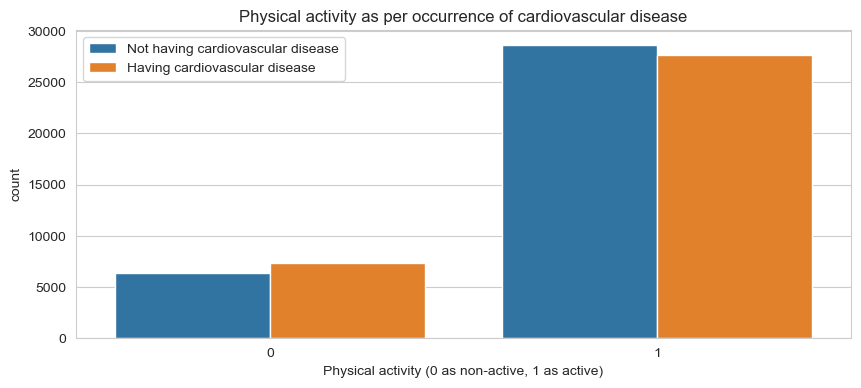

In [127]:
# Plotting physical activity with respect to occurrence of cardiovascular disease.
plt.figure(figsize = (10,4))
sns.countplot(data = df, x = "active",  hue = "cvd")
plt.title("Physical activity as per occurrence of cardiovascular disease")
plt.xlabel("Physical activity (0 as non-active, 1 as active)")
plt.legend(["Not having cardiovascular disease", "Having cardiovascular disease"])

In [128]:
df["cholesterol"] = df["cholesterol"].apply(lambda x: x-1)
# To check the percentage of cholesterol level of the patients.
x = df["cholesterol"].value_counts()/len(df["cholesterol"])*100
x.apply(Decimal)
print(x.round(decimals = 1))

cholesterol
0    74.8
1    13.6
2    11.5
Name: count, dtype: float64


In [129]:
df.groupby('cvd').mean()

,id,age,male,height,weight,ap_hi,ap_lo,cholesterol,glucose,smoke,alcohol_intake,active,bmi,bmi_class
cvd,,,,,,,,,,,,,,
0,49862.869107,51.731218,1.345707,164.448017,71.592150,120.432598,84.251763,0.216527,0.175380,0.092516,0.055424,0.817881,26.548175,2.800063
1,50082.102233,54.948083,1.353441,164.270334,76.822368,137.212042,109.023929,0.517396,0.277595,0.083736,0.052117,0.789559,28.566061,3.185197


In [130]:
# Adding a new parameter for Body Mass Index (bmi), a metric used to classify weight per height class.
# This will be a better indicator of health using weight and height.
# BMI = kg/m^2
df["bmi"] = df["weight"] *10000 / ((df["height"])**2)
# Now the bmi can be split into classes of bmi, which would help understand the data more.
bmi_ranges = [
    (df["bmi"] <= 15),                         # 0 - Anorexic
    (df["bmi"] > 15) & (df["bmi"] <= 18.5),    # 1 - Underweight
    (df["bmi"] > 18.5) & (df["bmi"] <= 25),    # 2 - Normal weight
    (df["bmi"] > 25) & (df["bmi"] <= 30),      # 3 - Overweight
    (df["bmi"] > 30) & (df["bmi"] <= 35),      # 4 - Obesity Class I
    (df["bmi"] > 35) & (df["bmi"] <= 40),      # 5 - Obesity Class II
    (df["bmi"] > 40)                           # 6 - Obesity Class III 
]

classes = [0, 1, 2, 3, 4, 5, 6]

df["bmi_class"] = np.select(bmi_ranges, classes)
df.head()

,id,age,male,height,weight,ap_hi,ap_lo,cholesterol,glucose,smoke,alcohol_intake,active,cvd,bmi,bmi_class
0,0,50,2,168,62.0,110,80,0,0,0,0,1,0,21.967120,2
1,1,55,1,156,85.0,140,90,2,0,0,0,1,1,34.927679,4
2,2,52,1,165,64.0,130,70,2,0,0,0,0,1,23.507805,2
3,3,48,2,169,82.0,150,100,0,0,0,0,1,1,28.710479,3
4,4,48,1,156,56.0,100,60,0,0,0,0,0,0,23.011177,2


<Axes: title={'center': 'Blood Pressure Data'}, xlabel='Systolic Blood Pressure (mmHg)', ylabel='Diastolic Blood Pressure (mmHg)'>

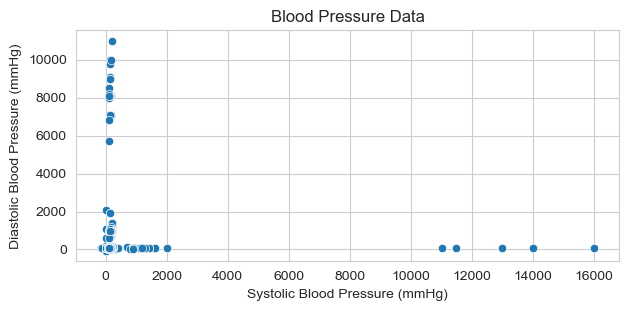

In [131]:
# Checking the blood pressure distribution of 'ap_hi' and 'ap_lo' columns for outliers.
plt.figure(figsize = (7,3))
plt.title("Blood Pressure Data")
plt.xlabel("Systolic Blood Pressure (mmHg)")
plt.ylabel("Diastolic Blood Pressure (mmHg)")
sns.scatterplot(data = df, x = "ap_hi", y = "ap_lo")

In [132]:
# The cholesterol options are mentioned by 1 as normal, 2 as above normal and 3 as well above normal. For better computation, it should be changed into 0 as normal, 1 as above normal and 2 as well above normal.
df["cholesterol"] = df["cholesterol"].apply(lambda x: x-1)
df.head()

,id,age,male,height,weight,ap_hi,ap_lo,cholesterol,glucose,smoke,alcohol_intake,active,cvd,bmi,bmi_class
0,0,50,2,168,62.0,110,80,-1,0,0,0,1,0,21.967120,2
1,1,55,1,156,85.0,140,90,1,0,0,0,1,1,34.927679,4
2,2,52,1,165,64.0,130,70,1,0,0,0,0,1,23.507805,2
3,3,48,2,169,82.0,150,100,-1,0,0,0,1,1,28.710479,3
4,4,48,1,156,56.0,100,60,-1,0,0,0,0,0,23.011177,2


In [133]:
# To check the percentage of cholesterol level of the patients.
from decimal import Decimal
x = df["cholesterol"].value_counts()/len(df["cholesterol"])*100
x.apply(Decimal)
print(x.round(decimals = 1))

cholesterol
-1    74.8
 0    13.6
 1    11.5
Name: count, dtype: float64


### Creating Dummy Variables

<Axes: >

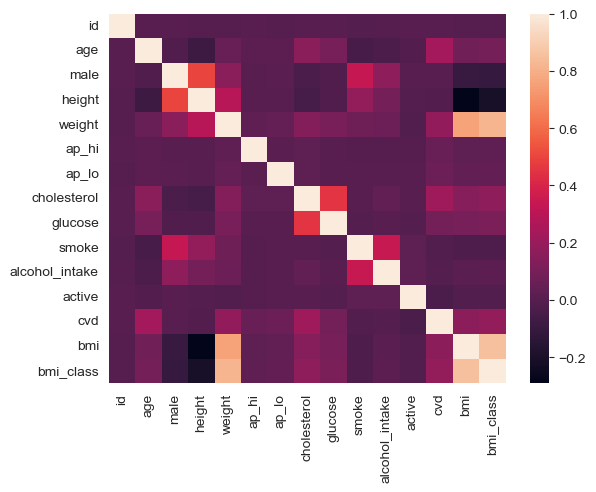

In [134]:
sns.heatmap(df.corr())

In [135]:
df.corr()['cvd']

id                0.003799
age               0.237749
male              0.008109
height           -0.010821
weight            0.181660
ap_hi             0.054475
ap_lo             0.065719
cholesterol       0.221147
glucose           0.089307
smoke            -0.015486
alcohol_intake   -0.007330
active           -0.035653
cvd               1.000000
bmi               0.165632
bmi_class         0.185847
Name: cvd, dtype: float64

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              70000 non-null  int64  
 1   age             70000 non-null  int64  
 2   male            70000 non-null  int64  
 3   height          70000 non-null  int64  
 4   weight          70000 non-null  float64
 5   ap_hi           70000 non-null  int64  
 6   ap_lo           70000 non-null  int64  
 7   cholesterol     70000 non-null  int64  
 8   glucose         70000 non-null  int64  
 9   smoke           70000 non-null  int64  
 10  alcohol_intake  70000 non-null  int64  
 11  active          70000 non-null  int64  
 12  cvd             70000 non-null  int64  
 13  bmi             70000 non-null  float64
 14  bmi_class       70000 non-null  int32  
dtypes: float64(2), int32(1), int64(12)
memory usage: 7.7 MB


In [137]:
accuracies = {}
f1s = {}

## Creating Model for Logistic Regression
<br>
We can use sklearn library or we can write functions ourselves. Let's them both. Firstly we will write our functions after that we'll use sklearn library to calculate score.

In [138]:
y=df['cvd']

In [139]:

x=df[['age','male','weight','ap_hi','alcohol_intake','cholesterol']]

In [140]:
x

,age,male,weight,ap_hi,alcohol_intake,cholesterol
0,50,2,62.0,110,0,-1
1,55,1,85.0,140,0,1
2,52,1,64.0,130,0,1
3,48,2,82.0,150,0,-1
4,48,1,56.0,100,0,-1
...,...,...,...,...,...,...
69995,53,2,76.0,120,0,-1
69996,62,1,126.0,140,0,0
69997,52,2,105.0,180,1,1
69998,61,1,72.0,135,0,-1


In [141]:
x.shape,y.shape

((70000, 6), (70000,))

In [142]:
from imblearn.over_sampling import SMOTENC
oversample = SMOTENC(categorical_features=[0,1],sampling_strategy={0:100000,
                                                                   1:100000})
x, y = oversample.fit_resample(x, y)

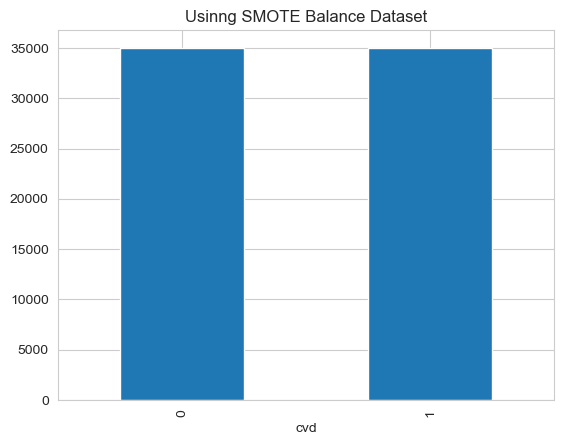

In [143]:
df['cvd'].value_counts().plot(kind='bar', title='Usinng SMOTE Balance Dataset');

In [144]:
x.shape,y.shape

((200000, 6), (200000,))

In [145]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.05,random_state=0,stratify=y)

In [146]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear',max_iter=10000).fit(x_train,y_train)
score = lr.score(x_test,y_test)
print(score)
accuracies['Linear'] = round(score*100,2)

0.7197


In [147]:
from sklearn.metrics import f1_score
f1s["LogisticRegression"] = f1_score(y_test,lr.predict(x_test))

### Sklearn Logistic Regression

## K-Nearest Neighbour (KNN) Classification
<br>
Let's see what will be score if we use KNN algorithm.

In [148]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 8)  # n_neighbors means k
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)

print("{} NN Score: {:.2f}%".format(2, knn.score(x_test, y_test)*100))

2 NN Score: 75.87%


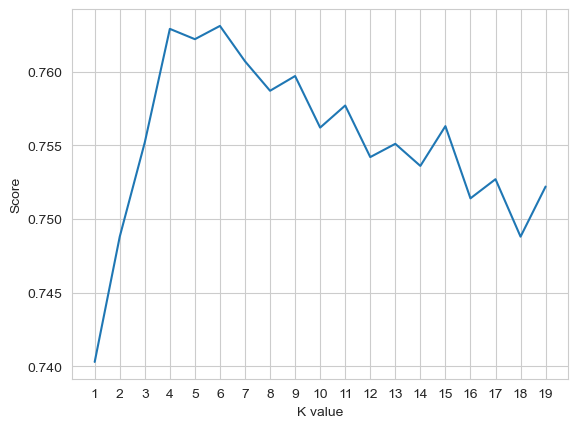

Maximum KNN Score is 76.31%


In [149]:
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(x_train, y_train)
    scoreList.append(knn2.score(x_test, y_test))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
accuracies['KNN'] = round(acc,2)
print("Maximum KNN Score is {:.2f}%".format(acc))

In [150]:
from sklearn.metrics import f1_score
f1s['KNN'] = f1_score(y_test,knn.predict(x_test))

In [151]:
from sklearn.svm import SVC

## SVC Algorithm

In [152]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)

acc = svc.score(x_test,y_test)*100
accuracies['SVC'] = round(acc,2)
print("Accuracy of SVC: {:.2f}%".format(acc))

Accuracy of SVC: 72.45%


In [153]:
from sklearn.metrics import f1_score
f1s['SVC'] = f1_score(y_test,svc.predict(x_test))

## Decision Tree Algorithm

In [154]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

acc = dtc.score(x_test, y_test)*100
accuracies['Decision Tree'] = round(acc,2)
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

Decision Tree Test Accuracy 77.53%


In [155]:
from sklearn.metrics import f1_score
f1s['Decision Tree']= f1_score(y_test,dtc.predict(x_test))

## Random Forest Classification

In [156]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1, n_jobs=-1,criterion='entropy') #,min_samples_split=0.3
rf.fit(x_train, y_train)
acc = rf.score(x_test,y_test)*100
accuracies['Random Forest'] = round(acc,2)
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 78.71%


In [157]:
from sklearn.metrics import f1_score
f1s['Random Forest']= f1_score(y_test,rf.predict(x_test))

In [159]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
en_base_models = [('lr',lr),('rf',rf),('dtc',dtc)]
ensemble = VotingClassifier(en_base_models,voting='soft')
ensemble.fit(x_train,y_train)
y_pred = ensemble.predict(x_test)
ensemble.score(x_test,y_test)
acc = ensemble.score(x_test,y_test)*100
accuracies['Modified Ensemble'] = round(acc,2)
print(" Modified Ensemble Algorithm Accuracy Score : {:.2f}%".format(acc))

 Modified Ensemble Algorithm Accuracy Score : 78.37%


In [160]:
from sklearn.metrics import f1_score
f1s['Modified Ensemble'] = f1_score(y_test,ensemble.predict(x_test))

## Comparing Models

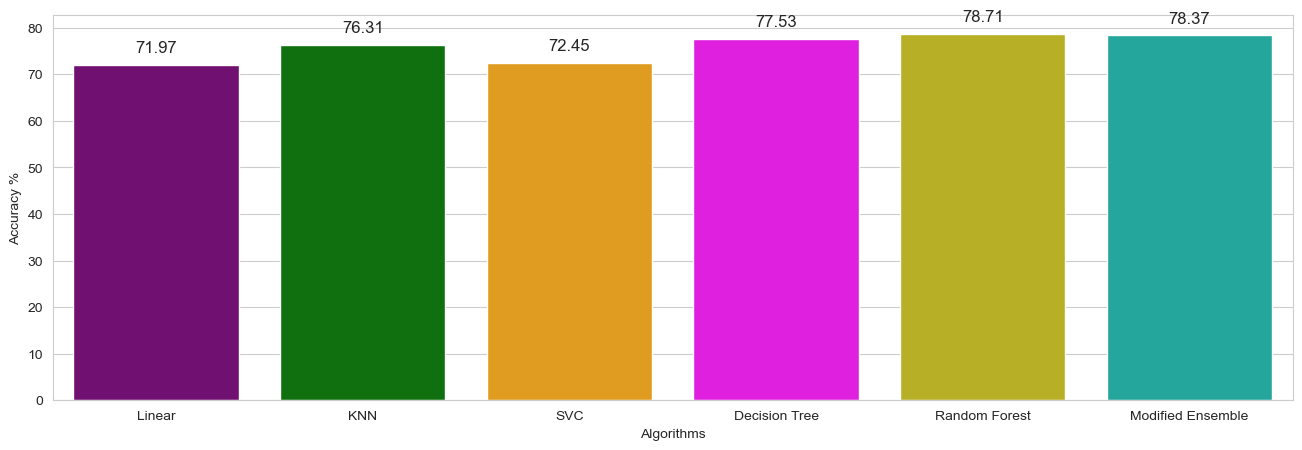

In [161]:

colors = ["purple", "green", "orange", "magenta", "#CFC60E", "#0FBBAE"]
sns.set_style("whitegrid")
plt.figure(figsize=(16, 5))
plt.yticks(np.arange(0, 100, 10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")


barplot = sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
for i, v in enumerate(list(accuracies.values())):
    plt.text(i, v + 2, str(v), ha='center', va='bottom', fontsize=12)

plt.show()

The models work fine but best of them are Random Forest with of accuracy.

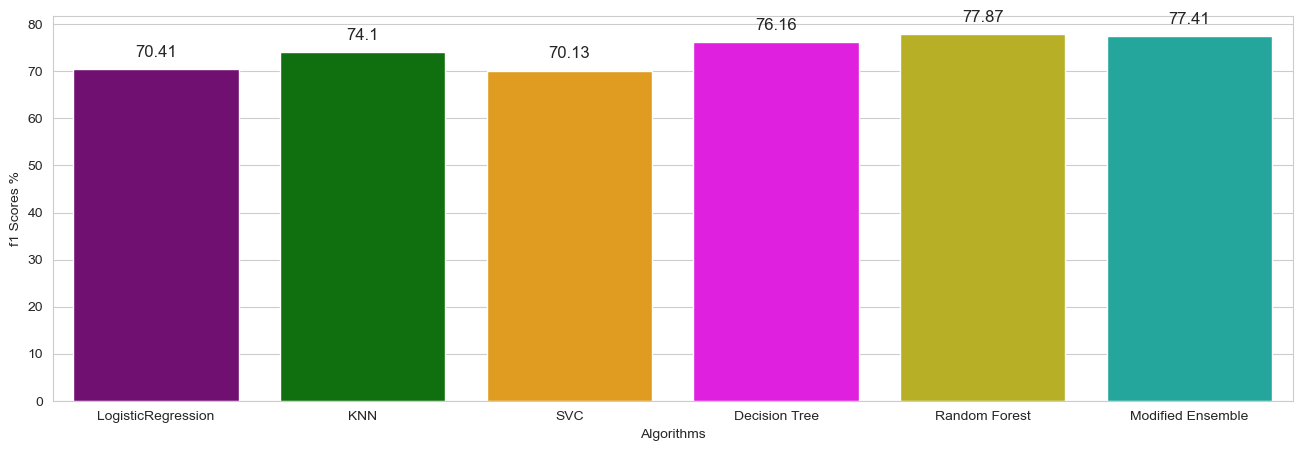

In [162]:

colors = ["purple", "green", "orange", "magenta", "#CFC60E", "#0FBBAE"]
sns.set_style("whitegrid")
plt.figure(figsize=(16, 5))
plt.yticks(np.arange(0, 100, 10))
plt.ylabel("f1 Scores %")
plt.xlabel("Algorithms")

y=[round(x*100,2) for x in f1s.values()]
barplot = sns.barplot(x=list(f1s.keys()),y=y, palette=colors)
for i, v in enumerate(y):
    plt.text(i, v + 2, str(v), ha='center', va='bottom', fontsize=12)

plt.show()